In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# create a tiny ToM dataset
data = [
    {"scenario_id": 1, "scenario_text": "Sally puts the ball in a basket. Anne moves it while Sally is away. Where will Sally look?", "correct_answer": "basket"},
    {"scenario_id": 2, "scenario_text": "Tom hides a toy. Jerry moves it. Where does Tom think it is?", "correct_answer": "toy"},
    {"scenario_id": 3, "scenario_text": "Alex thinks the ice cream is in the fridge. Jamie eats it. Where does Alex look?", "correct_answer": "fridge"},
    {"scenario_id": 4, "scenario_text": "Lisa puts the cookie on the plate. Mark moves it. Where does Lisa look?", "correct_answer": "plate"}
]

df = pd.DataFrame(data)
df.to_csv("tom_tasks_simple.csv", index=False)
print("CSV created!")

CSV created!


In [13]:
# Tiny Theory of Mind dataset
tom_tasks = [
    {"scenario_id": 1, "scenario_text": "Sally puts the ball in a basket. Anne moves it while Sally is away. Where will Sally look?", "correct_answer": "basket"},
    {"scenario_id": 2, "scenario_text": "Tom hides a toy. Jerry moves it. Where does Tom think it is?", "correct_answer": "toy"},
    {"scenario_id": 3, "scenario_text": "Alex thinks the ice cream is in the fridge. Jamie eats it. Where does Alex look?", "correct_answer": "fridge"},
    {"scenario_id": 4, "scenario_text": "Lisa puts the cookie on the plate. Mark moves it. Where does Lisa look?", "correct_answer": "plate"}
]

import pandas as pd
df = pd.DataFrame(tom_tasks)
df


,scenario_id,scenario_text,correct_answer
0,1,Sally puts the ball in a basket. Anne moves it...,basket
1,2,Tom hides a toy. Jerry moves it. Where does To...,toy
2,3,Alex thinks the ice cream is in the fridge. Ja...,fridge
3,4,Lisa puts the cookie on the plate. Mark moves ...,plate


In [6]:
!pip install transformers


In [14]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

In [15]:
def query_model(prompt):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(**inputs, max_length=50)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

df['model_answer'] = df['scenario_text'].apply(query_model)
df

,scenario_id,scenario_text,correct_answer,model_answer
0,1,Sally puts the ball in a basket. Anne moves it...,basket,Sally will look at the ball.
1,2,Tom hides a toy. Jerry moves it. Where does To...,toy,a toy
2,3,Alex thinks the ice cream is in the fridge. Ja...,fridge,Jamie
3,4,Lisa puts the cookie on the plate. Mark moves ...,plate,Mark's hands.


In [18]:
# Use simple keyword match
def is_correct(model_answer, correct_answer):
    return correct_answer.lower() in model_answer.lower()

df['correct'] = df.apply(lambda row: is_correct(row['model_answer'], row['correct_answer']), axis=1)
accuracy = df['correct'].mean()
print(f"AI Theory of Mind Accuracy: {accuracy*100:.2f}%")


AI Theory of Mind Accuracy: 25.00%


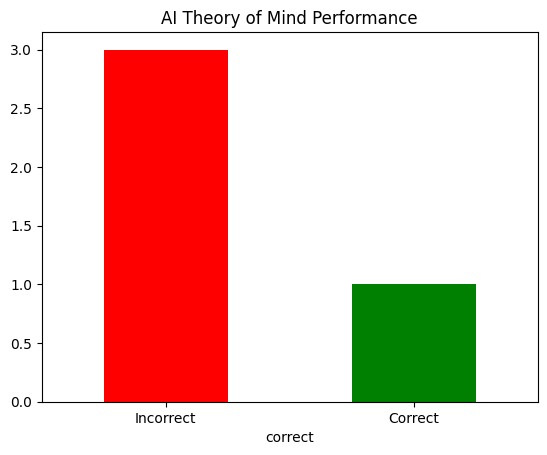

In [19]:
import matplotlib.pyplot as plt

df['correct'].value_counts().plot(kind='bar', color=['red','green'])
plt.xticks([0,1], ['Incorrect','Correct'], rotation=0)
plt.title('AI Theory of Mind Performance')
plt.show()